In [63]:
import pandas as pd
from datetime import datetime

df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv", header=0)
print(df.head())
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
df.set_index("Month", inplace=True)
print("---------------")
df.describe()

  Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3
---------------


,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


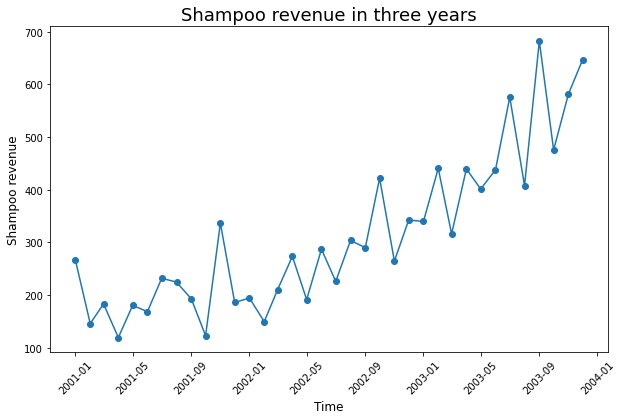

In [64]:
import matplotlib.pyplot as plt

# Create outlier in 2002-05
df.loc["2002-05"]["Sales"] = df.loc["2002-05"]["Sales"]+500

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], marker="o")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

In [65]:
diff_sales = df["Sales"][1:].values - df["Sales"][:-1].values
print(diff_sales)

[-120.1   37.2  -63.8   61.   -11.8   63.3   -7.3  -31.7  -69.9  213.6
 -150.6    8.4  -44.8   60.6   63.2  -81.9   95.6  -61.    77.6  -13.7
  131.7 -157.1   77.8   -2.6  100.7 -124.5  123.4  -38.    36.1  138.1
 -167.9  274.4 -206.7  106.    65.6]


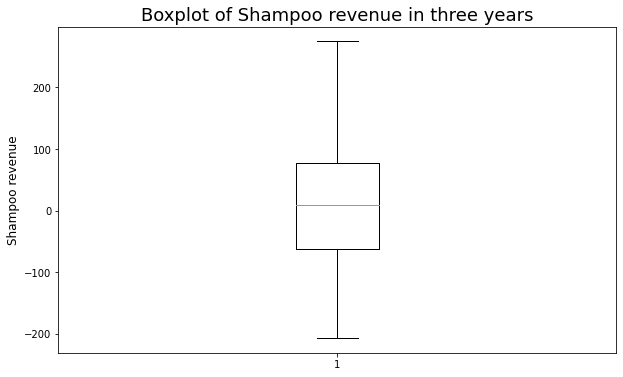

In [66]:
plt.figure(figsize=(10, 6))
plt.boxplot(diff_sales)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.title("Boxplot of Shampoo revenue in three years", fontsize=18)
plt.show()

In [67]:
import numpy as np

def detect_outliers(series):
  """
    series: 1-D numpy array input
  """
  Q1 = np.quantile(series, 0.25)
  Q3 = np.quantile(series, 0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  lower_compare = series <= lower_bound
  upper_compare = series >= upper_bound
  outlier_idxs = np.where(lower_compare | upper_compare)[0]
  return outlier_idxs

outlier_idxs=detect_outliers(diff_sales)
print("Outlier indices: ", outlier_idxs)
print("Outlier months: ", df.index[outlier_idxs+1].values)
print("Outlier values: ", diff_sales[outlier_idxs])

Outlier indices:  []
Outlier months:  []
Outlier values:  []


Phát hiện yếu tố chu kỳ và mùa vụ

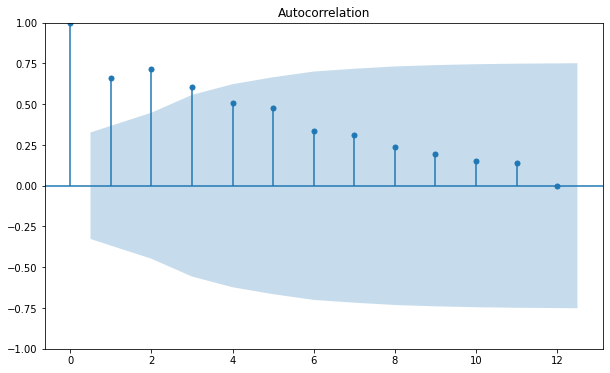

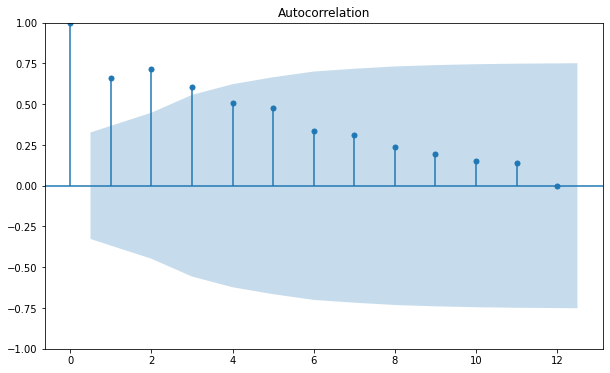

In [68]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc("figure", figsize=(10, 6))
plot_acf(df["Sales"], lags = 12)

Xử lý dữ liệu khuyết

In [69]:
import numpy as np

def _interpolate(p1, p2, x):
  """
  p1: start point (x1, y1)
  p2: end point (x2, y2)
  """
  x1, y1 = p1
  x2, y2 = p2
  y = y1 + (x-x1)*(y2-y1)/(x2-x1)
  return y

# # Missing at indice=1 
# df["Sales"].iloc[1] = np.nan

# p1 = (0, df["Sales"].iloc[0])
# p2 = (2, df["Sales"].iloc[2])
# x = 1
# print(p1, p2)
# print("interpolation value at x=1: ", _interpolate(p1, p2, 1))

Trung bình trượt là phương pháp làm mịn chuỗi bằng cách lấy trung bình của chuỗi trong một khung thời gian. Trung bình trượt có tác dụng theo dõi giao động trong ngắn hạn và nhận biết được xu hướng trong dài hạn của chuỗi.

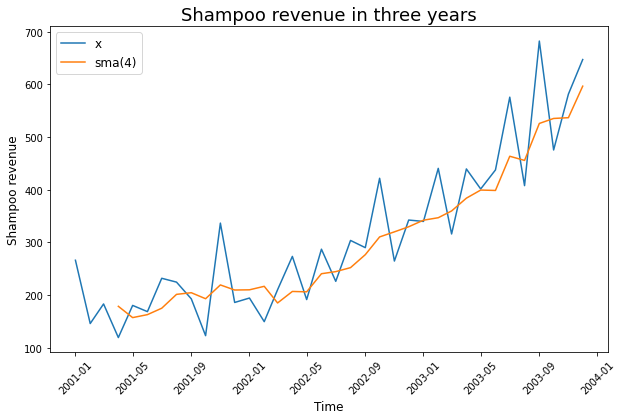

In [70]:
# Single moving average in pandas
df_sma = df.rolling(window=4).mean()
plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_sma["Sales"], label="sma(4)")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

Loại bỏ yếu tố xu thế

            Sales
Month            
2001-01-01  266.0
2001-02-01  145.9
2001-03-01  183.1
2001-04-01  119.3
2001-05-01  180.3
2001-06-01  168.5
2001-07-01  231.8
2001-08-01  224.5
2001-09-01  192.8
2001-10-01  122.9
2001-11-01  336.5
2001-12-01  185.9
2002-01-01  194.3
2002-02-01  149.5
2002-03-01  210.1
2002-04-01  273.3
2002-05-01  191.4
2002-06-01  287.0
2002-07-01  226.0
2002-08-01  303.6
2002-09-01  289.9
2002-10-01  421.6
2002-11-01  264.5
2002-12-01  342.3
2003-01-01  339.7
2003-02-01  440.4
2003-03-01  315.9
2003-04-01  439.3
2003-05-01  401.3
2003-06-01  437.4
2003-07-01  575.5
2003-08-01  407.6
2003-09-01  682.0
2003-10-01  475.3
2003-11-01  581.3
2003-12-01  646.9


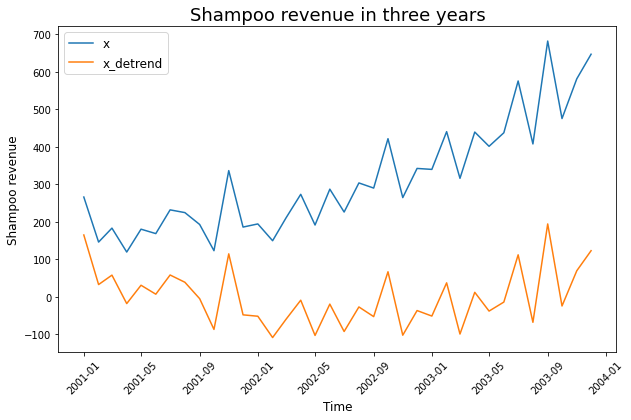

In [71]:
import numpy as np
from scipy import signal
print(df)

x_detrend = signal.detrend(df["Sales"].values)
df_detrend = pd.DataFrame({"Sales_Detrend": x_detrend}, index=df.index)

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x")
plt.plot(df_detrend, label="x_detrend")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

Phân rã mùa vụ

0     1-01
1     1-02
2     1-03
3     1-04
4     1-05
5     1-06
6     1-07
7     1-08
8     1-09
9     1-10
10    1-11
11    1-12
12    2-01
13    2-02
14    2-03
15    2-04
16    2-05
17    2-06
18    2-07
19    2-08
20    2-09
21    2-10
22    2-11
23    2-12
24    3-01
25    3-02
26    3-03
27    3-04
28    3-05
29    3-06
30    3-07
31    3-08
32    3-09
33    3-10
34    3-11
35    3-12
Name: Month, dtype: object


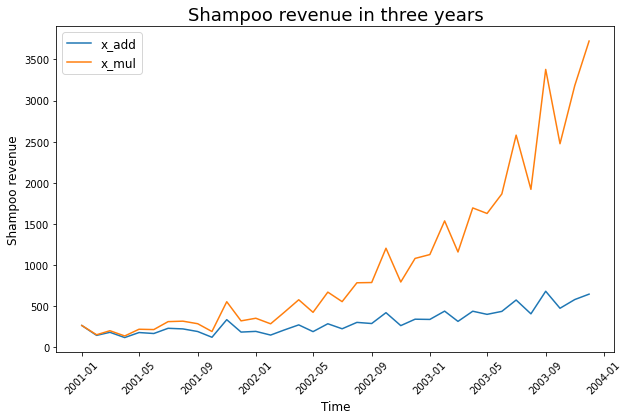

In [74]:
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/phamdinhkhanh/tabml/main/sales-of-shampoo-over-a-three-ye.csv", header=0)
print(df["Month"])
df["Month"] = df['Month'].apply(lambda x: pd.to_datetime("200"+x))
print(df["Month"])
df.set_index("Month", inplace=True)

# Tạo chuỗi nhân tính
multip = np.arange(df.shape[0])
multip = np.exp(multip/20)
df_mul = df.copy()
df_mul["Sales"] = df_mul["Sales"]*multip

plt.figure(figsize=(10, 6))
plt.plot(df["Sales"], label="x_add")
plt.plot(df_mul["Sales"], label="x_mul")
plt.xticks(rotation=45)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Shampoo revenue", fontsize=12)
plt.legend(fontsize=12)
plt.title("Shampoo revenue in three years", fontsize=18)
plt.show()

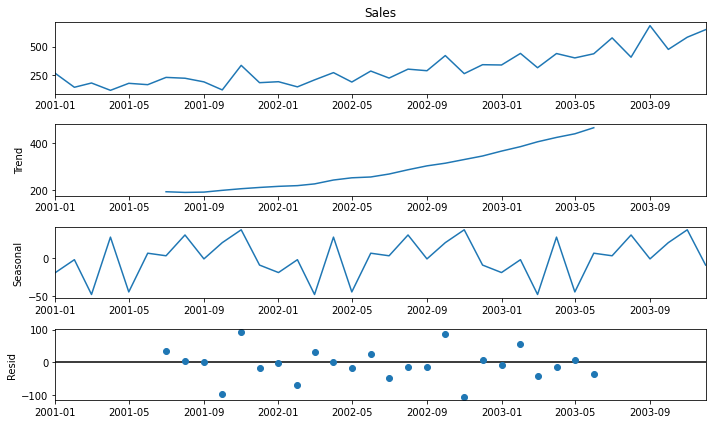

In [73]:
from random import randrange
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Sales"], model='additive')
result.plot()
plt.show()